# CNN-LSTM for video 

LSTMs can also be used for video. And, precisely, it's an extremely relevant addition because a video is nothing but a sequence of images ;) 

* Import `tensorflow`

'2.4.1'

* Using `tf.keras.utils.get_file` import the dataset `http://www.robots.ox.ac.uk/~alonso/data/tv_human_interactions_videos.tar.gz`

163536896/163535078 [==============================] - 8s 0us/step


* Via `pathlib`, build a path to your `tv_human_interactions_videos` directory.

[PosixPath('/content/tv_human_interactions_videos/highFive_0043.avi'),
 PosixPath('/content/tv_human_interactions_videos/highFive_0047.avi'),
 PosixPath('/content/tv_human_interactions_videos/kiss_0028.avi'),
 PosixPath('/content/tv_human_interactions_videos/highFive_0031.avi'),
 PosixPath('/content/tv_human_interactions_videos/handShake_0012.avi')]

* Create a list of labels for each of the videos 

In [ ]:
# Get image labels 

['highFive',
 'highFive',
 'kiss',
 'highFive',
 'handShake',
 'hug',
 'hug',
 'handShake',
 'handShake',
 'kiss',
 'highFive',
 'kiss',
 'hug',
 'hug',
 'hug',
 'highFive',
 'handShake',
 'kiss',
 'highFive',
 'kiss',
 'hug',
 'hug',
 'highFive',
 'hug',
 'kiss',
 'kiss',
 'kiss',
 'kiss',
 'handShake',
 'hug',
 'hug',
 'handShake',
 'kiss',
 'kiss',
 'handShake',
 'kiss',
 'hug',
 'highFive',
 'highFive',
 'highFive',
 'handShake',
 'highFive',
 'hug',
 'handShake',
 'highFive',
 'kiss',
 'handShake',
 'highFive',
 'handShake',
 'highFive',
 'hug',
 'handShake',
 'handShake',
 'highFive',
 'kiss',
 'kiss',
 'handShake',
 'hug',
 'kiss',
 'handShake',
 'handShake',
 'handShake',
 'hug',
 'kiss',
 'hug',
 'hug',
 'highFive',
 'highFive',
 'handShake',
 'kiss',
 'kiss',
 'highFive',
 'kiss',
 'hug',
 'kiss',
 'kiss',
 'hug',
 'hug',
 'hug',
 'handShake',
 'highFive',
 'highFive',
 'highFive',
 'handShake',
 'hug',
 'highFive',
 'handShake',
 'kiss',
 'highFive',
 'kiss',
 'highFive',
 '

* Create a dictionary containing each of the labels and an index number 

In [ ]:
# Get index for both cats and dogs  

{'handShake': 1, 'highFive': 3, 'hug': 2, 'kiss': 0}

* Create a list containing only the index numbers of each of the labels.

In [ ]:
# Create labels for each image

[3, 3, 0, 3, 1]

* Create a `tf.data.Dataset` containing your list of labels.

In [ ]:
# Create a tf dataset for the labels

* We will now have to cut each of the videos into frames and include them in a tensor with the following dimensions: `(number of frames, width, height, channels)`.
  * For this first step import `cv2` & `numpy`

* Look at the `cv2` documentation and see how you can pull a tensor for each frame of your video. 
  * Then you'll need to create a large tensor containing all the sub-form videos, themselves, of tensors.
  * Try to apply your method on a video and try to visualize an image of this video 

54


(54, 352, 624, 3)

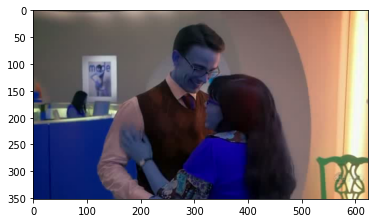

* Now that you've managed to view an image, create a function that generalizes your method and apply it to all the videos in your dataset. 
  * Be careful, it can take a little time to apply your function. So pay attention to your level of RAM. 

In [ ]:
# Create a parse function 

['/content/tv_human_interactions_videos/highFive_0043.avi',
 '/content/tv_human_interactions_videos/highFive_0047.avi',
 '/content/tv_human_interactions_videos/kiss_0028.avi',
 '/content/tv_human_interactions_videos/highFive_0031.avi',
 '/content/tv_human_interactions_videos/handShake_0012.avi']

* We now have one thing to settle. Our neural network will need to have videos with exactly the same shape. In other words, the videos need to be the same size. But they are not. 
  * Start by seeing the minimum size of a video. You can see it by the number of frames per video.

22

* We need to have videos of shape `(22, width, height, 3)`. 
  * So we need to take random 22 frames for all videos that have more than 22 frames. So find a way to do that. 

* Create a `tf.data.Dataset` containing your list of the videos.

In [ ]:
# Create a tf dataset

* Now that you have a dataset of your videos, create a `tf.data.Dataset` containing your labels and your videos. 

In [ ]:
# Zip labels and images 

* Look at an example of an image

3


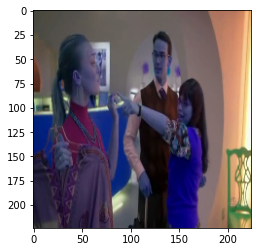

In [ ]:
# Example 

* Do a train-test-split

In [ ]:
# Train_Test_Split

* Make a shuffle on your train and your test dataset and create batches of 4 videos for them

In [ ]:
# Shuffle and create batches of 4 videos

* Now create a CNN-LSTM model. Using the tensorflow documentation, add layers : 
  * ConvLTSM2D
  * Conv3D

In [ ]:
# Model 
                    # CNN LSTM layer
                             
                    # Conv3D layer

                    # CNN LSTM layer

                    # Flatten 

                    # Dense layer

                    # Output layer

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_lst_m2d (ConvLSTM2D)    (None, 22, 222, 222, 8)   3200      
_________________________________________________________________
conv3d (Conv3D)              (None, 20, 220, 220, 16)  3472      
_________________________________________________________________
conv3d_1 (Conv3D)            (None, 18, 218, 218, 8)   3464      
_________________________________________________________________
bidirectional (Bidirectional (None, 216, 216, 16)      9280      
_________________________________________________________________
flatten (Flatten)            (None, 746496)            0         
_________________________________________________________________
dense (Dense)                (None, 64)                47775808  
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2

* Make a test to see if everything works well by making a prediction on a video with your model

[0 0 0 0]
tf.Tensor([3 1 0 2], shape=(4,), dtype=int32)


* Compile your template and create a `lr_schedule`

In [ ]:
# Let's create a learning rate schedule to decrease the learning rate as we train the model 

# Using a simple compiler with an Adam optimizer to compute our gradients 

* Now practice your model on 20 coats of epoch.

Epoch 1/20
35/35 [==============================] - 42s 1s/step - loss: 1.4258 - sparse_categorical_accuracy: 0.3144 - val_loss: 1.3895 - val_sparse_categorical_accuracy: 0.1500
Epoch 2/20
35/35 [==============================] - 35s 982ms/step - loss: 1.3770 - sparse_categorical_accuracy: 0.3913 - val_loss: 1.3922 - val_sparse_categorical_accuracy: 0.2000
Epoch 3/20
35/35 [==============================] - 35s 982ms/step - loss: 1.3668 - sparse_categorical_accuracy: 0.3108 - val_loss: 1.4896 - val_sparse_categorical_accuracy: 0.1500
Epoch 4/20
35/35 [==============================] - 35s 983ms/step - loss: 1.3191 - sparse_categorical_accuracy: 0.3142 - val_loss: 1.4038 - val_sparse_categorical_accuracy: 0.2167
Epoch 5/20
35/35 [==============================] - 35s 984ms/step - loss: 1.2099 - sparse_categorical_accuracy: 0.4252 - val_loss: 1.4239 - val_sparse_categorical_accuracy: 0.2500
Epoch 6/20
35/35 [==============================] - 35s 983ms/step - loss: 0.9890 - sparse_categor

* Visualize your `categorical accuracy` & your `loss` in relation to your epochs. 

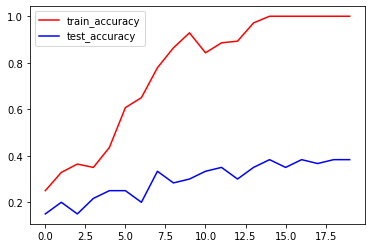

In [ ]:
# Visualize train / valid Accuracy

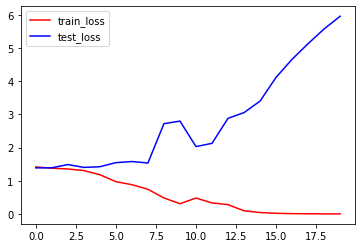

In [ ]:
# Visualize train / valid Loss

* Make a prediction on a video 

Prediction pour un batch de vidéos : [2 2 2 1]
Réalité: [2 1 2 3]
